In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline
iris=load_iris()
target_matrix=iris.target
target_names=iris.target_names

In [2]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['species(target)']=target_matrix

In [3]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [4]:
scaler.fit(df.drop('species(target)',axis=1))

StandardScaler()

In [5]:
scaled_features=scaler.transform(df.drop('species(target)',axis=1))

In [6]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(scaled_features,df['species(target)'],test_size=0.30,random_state=101)
x_train.shape, x_test.shape

((105, 4), (45, 4))

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [10]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

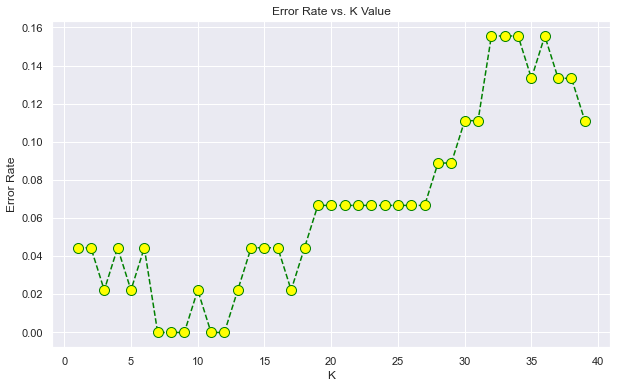

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='green',linestyle='dashed',marker='o',
        markerfacecolor='yellow',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [12]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('With k=15')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

With k=15


[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [13]:
def func(x):
    if(x==0):
        return 'setosa'
    elif(x==1):
        return 'versicolor'
    elif(x==2):
        return 'virginica'

In [14]:
print(func(knn.predict([[2,5,0,0.1]])))
print(func(knn.predict([[3.5,4.3,2.1,3.4]])))

setosa
virginica
